                                                            FACE MASK DETECTION USING CNN

1. IMPORTING LIBRARIES

In [1]:

# Import Core Libraries
import numpy as np
import os

# Importing Visualisation Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image Preprocessing Libraries
from PIL import Image
import cv2 

# Data Preprocessing Libraries
from sklearn.model_selection import train_test_split

# Deep learnning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


2. DATASET PATHS

In [2]:
# Define Dataset Paths
data_dir_with_mask = "data/with_mask/"
data_dir_without_mask = "data/without_mask/"


3. LOADING AND CHECKING FILES

In [3]:
# Load and Check Files in Directories
with_mask_files = os.listdir(data_dir_with_mask)
without_mask_files = os.listdir(data_dir_without_mask)


In [4]:
print("Sample files with mask:", with_mask_files[:5])
print("Sample files without mask:", without_mask_files[:5])
print("Number of mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))


Sample files with mask: ['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
Sample files without mask: ['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
Number of mask images: 3725
Number of without mask images: 3828


4. CREATING LABELS FOR IMAGES

In [5]:
# Label 1 for with mask
# Label 0 for without mask

with_mask_labels = [1] * len(with_mask_files)  
without_mask_labels = [0] * len(without_mask_files) 
 
labels = with_mask_labels + without_mask_labels
print("Total labels:", len(labels))


Total labels: 7553


5. DISPLAYING SAMPLE IMAGES

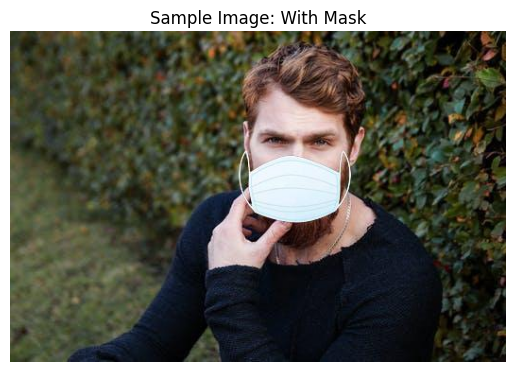

In [6]:
# Display a sample image with mask
img_with_mask = mpimg.imread(data_dir_with_mask + with_mask_files[0])
plt.imshow(img_with_mask)
plt.title("Sample Image: With Mask")
plt.axis('off')
plt.show()


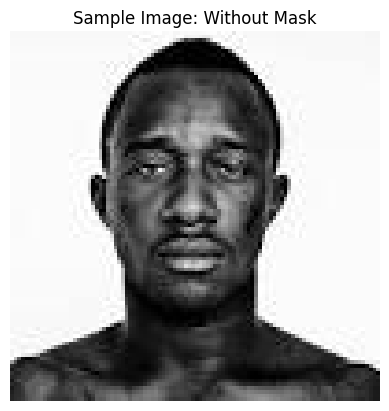

In [7]:
# Display a sample image without mask
img_without_mask = mpimg.imread(data_dir_without_mask + without_mask_files[0])
plt.imshow(img_without_mask)
plt.title("Sample Image: Without Mask")
plt.axis('off')
plt.show()


6. PREPROCESSING IMAGES

In [8]:
# Resize and convert images to numpy arrays
data = []

def preprocess_image(img_path):
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    return np.array(image)

for img_file in with_mask_files:
    data.append(preprocess_image(data_dir_with_mask + img_file))

for img_file in without_mask_files:
    data.append(preprocess_image(data_dir_without_mask + img_file))


C:\Users\mahes\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
# Convert to numpy arrays
X = np.array(data)
Y = np.array(labels)


In [10]:
# checking the shapes
print("Data shape:", X.shape)
print("Labels shape:", Y.shape)

Data shape: (7553, 128, 128, 3)
Labels shape: (7553,)


7. TRAIN TEST SPLIT

In [11]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
# Printing the shape
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (6042, 128, 128, 3)
Test data shape: (1511, 128, 128, 3)


8. SCALING THE DATA

In [13]:
# Scale Data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0


9. CNN MODEL

In [14]:
# Define CNN Model Architecture
model = Sequential([

    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),
    
    Dense(2, activation='softmax') 
])


C:\Users\mahes\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10. COMPILING THE MODEL

In [15]:
# Compile the Model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


11. TRAIN THE MODEL

In [16]:
# Train the Model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)


Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 253ms/step - accuracy: 0.6969 - loss: 0.6134 - val_accuracy: 0.9140 - val_loss: 0.3306
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.8840 - loss: 0.3046 - val_accuracy: 0.9322 - val_loss: 0.2012
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 42s 244ms/step - accuracy: 0.9020 - loss: 0.2497 - val_accuracy: 0.9322 - val_loss: 0.1635
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.9161 - loss: 0.2183 - val_accuracy: 0.9488 - val_loss: 0.1364
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.9232 - loss: 0.1773 - val_accuracy: 0.9455 - val_loss: 0.1313
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - accuracy: 0.9433 - loss: 0.1500 - val_accuracy: 0.9570 - val_loss: 0.1299
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 45s 263ms/step - accuracy: 0.9565 - loss: 0.1255 - val_accuracy: 0.9521 - val_loss: 0.1349
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 238ms/step - accuracy: 0.9669 - loss: 0

In [24]:
# summar for the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,202,120 (84.69 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,801,414 (56.46 MB)

12. EVALUATE THE MODEL

In [17]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy:", accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9426 - loss: 0.2121
Test Accuracy: 0.9477167725563049


13. ANALYSING THROUGH PLOTS

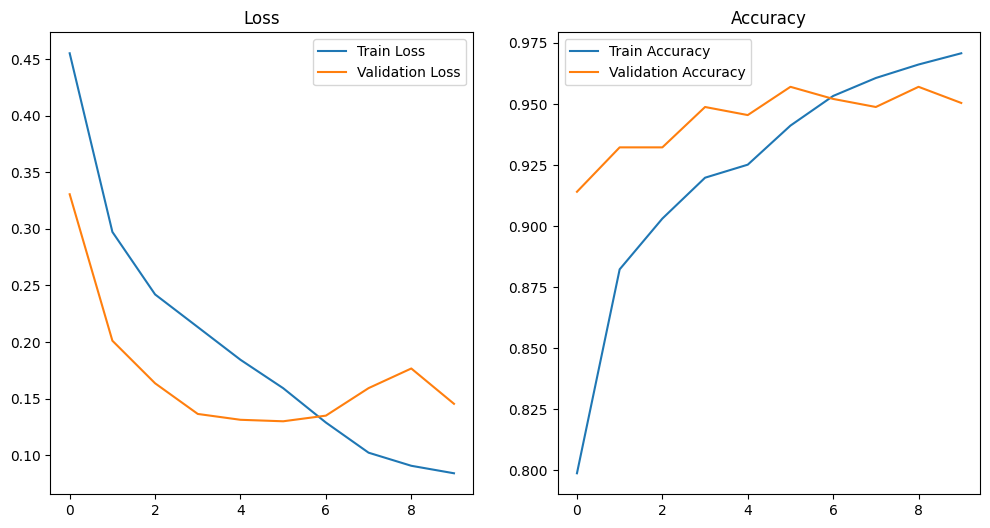

In [18]:

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


14. BUILDING THE PREDICTIVE SYSTEM

In [19]:
#  Build Predictive System
input_img_path = "E:\_ML_CODE\PROJECTS\Face Mask Detection System\data\with_mask\with_mask_1.jpg"
input_image = cv2.imread(input_img_path)

if input_image is None:
    print(f"Error: Unable to load image from path: {input_img_path}")
    exit()


<>:2: SyntaxWarning: invalid escape sequence '\_'
<>:2: SyntaxWarning: invalid escape sequence '\_'
C:\Users\mahes\AppData\Local\Temp\ipykernel_14028\2924563805.py:2: SyntaxWarning: invalid escape sequence '\_'
  input_img_path = "E:\_ML_CODE\PROJECTS\Face Mask Detection System\data\with_mask\with_mask_1.jpg"


In [21]:
# Preprocess the input image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, (1, 128, 128, 3))


In [22]:
# Make prediction
input_prediction = model.predict(input_image_reshaped)
predicted_label = np.argmax(input_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [23]:
# Display the prediction
if predicted_label == 1:
    print("Prediction: Person is wearing a mask.")
else:
    print("Prediction: Person is not wearing a mask.")

Prediction: Person is wearing a mask.
